In [1]:
import hls4ml
from hls4ml.model.profiling import numerical

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

import os

if '/tools/Xilinx/Vivado/2020.1/bin:' not in os.environ['PATH']:
    print("adding Vivado_HLS to path")
    os.environ['PATH'] = '/tools/Xilinx/Vivado/2020.1/bin:' + os.environ['PATH']
else:
    print("Vivado_HLS already in path")

adding Vivado_HLS to path


/home/maayan/anaconda3/lib/python3.9/site-packages/hls4ml/converters/__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [2]:

model_path = 'DNN_1664_Model.h5'
weights_path = 'DNN_1664_Model.weights.best.hdf5'
test_path = 'DNN_16_Test_Set.csv'
x_columns = 'ET_Ratio0,ET_Ratio1,ET_Ratio2,ET_Ratio3,ET_Ratio4,ET_Max_Ratio0,ET_Max_Ratio1,ET_Max_Ratio2,ET_Max_Ratio3,ET_Max_Ratio4,Eta_COM_1,Eta_COM_2,Eta_COM_4,Phi_COM_1,Phi_COM_2,Phi_COM_4'.split(',')


trace = True
hls_predict = True

In [3]:
if trace or hls_predict:
    test_data = pd.read_csv(test_path)
    print(test_data.head())
    X = test_data.loc[:,x_columns].values
    print(X.shape)
    
    

   signal  event_num  truth_pt  tob_pt     run3  Jfex_iso  seed_eta  \
0     1.0   148329.0  15.99520  11.275   6025.0  0.700885     -0.05   
1     1.0   148420.0  11.68750   3.775   3950.0  0.000000      0.85   
2     1.0   148945.0  16.87380  12.400  10150.0  0.354920     -0.25   
3     1.0   148992.0   7.69411   4.275   2925.0  0.000000      0.25   
4     1.0   148429.0  24.24220  12.600  13275.0 -0.325274     -0.05   

   ET_Ratio0  ET_Ratio1  ET_Ratio2  ...  ET_Max_Ratio1  ET_Max_Ratio2  \
0   0.048076   0.290724   0.391015  ...       0.215679       0.256496   
1   0.201707   0.520549   0.000000  ...       0.204669       0.000000   
2   0.061531   0.365322   0.564626  ...       0.225363       0.245240   
3   0.000000   0.383081   0.591045  ...       0.168199       0.288779   
4   0.020067   0.147739   0.228184  ...       0.083952       0.157706   

   ET_Max_Ratio3  ET_Max_Ratio4  Eta_COM_1  Eta_COM_2  Eta_COM_4  Phi_COM_1  \
0       0.434019       0.575104   0.108412   0.195393  

In [4]:
tfmodel = tf.keras.models.load_model(model_path)
tfmodel.load_weights(weights_path)


print(tfmodel.summary())

tfmodel.predict(X)

2023-06-25 11:36:57.977531: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-25 11:36:58.011804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-25 11:36:58.012846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-25 11:36:58.014593: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                1088      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________
None


2023-06-25 11:36:59.473981: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


array([[0.7388223 ],
       [0.4623875 ],
       [0.4103806 ],
       ...,
       [0.23941803],
       [0.35526612],
       [0.32326087]], dtype=float32)

Interpreting Model
Topology:
Layer name: input_2, layer type: Input
Layer name: dense_3, layer type: Dense
  -> Activation (relu), layer name: dense_3
Layer name: dense_4, layer type: Dense
  -> Activation (relu), layer name: dense_4
Layer name: dense_5, layer type: Dense
  -> Activation (sigmoid), layer name: dense_5
Interpreting Model
Topology:
Layer name: input_2, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense_3, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: dense_4, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 16]
Layer name: dense_5, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
Interpreting Model
Topology:
Layer name: input_2, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense_3, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name:

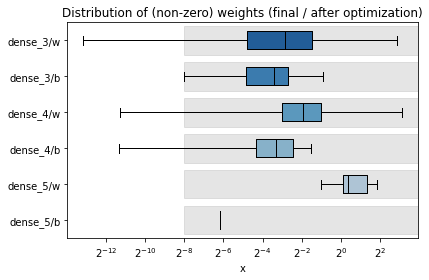

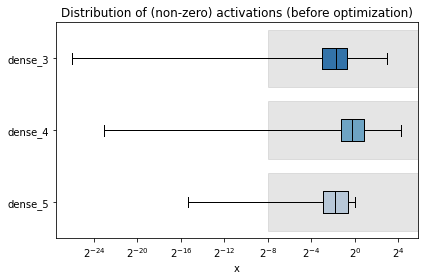

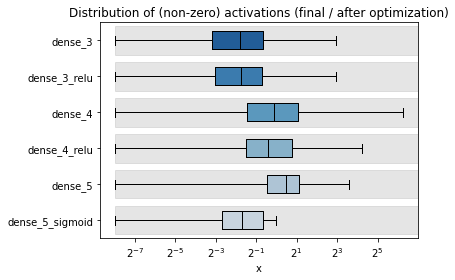


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2020.1 (64-bit)
  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020
  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2020.1/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2020.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'maayan' on host 'maayan-ASUS-TUF-Dash-F15-FX516PR-FX516PR' (Linux_x86_64 version 5.15.0-75-generic) on Sun Jun 25 11:37:51 IDT 2023
INFO: [HLS 200-10] On os Ubuntu 20.04.4 LTS
INFO: [HLS 200-10] In directory '/home/maayan/Desktop/PythonProjects/for_boping/my-hls-test'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/maayan/Desktop/PythonProjects/for_boping/my-hls-test/TAU2_DNN_Model_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/TAU2_DNN_Model.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'TA

INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' (firmware/nnet_utils/nnet_dense_latency.h:34:50).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::relu<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, relu_config5>' (firmware/nnet_utils/nnet_activation.h:71:39).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config4>' (firmware/nnet_utils/nnet_dense_latency.h:39:55).
INFO: [XFORM 203-502] Unrolling all loops for pipelining in function 'nnet::relu<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, relu_config3>' (firmware/nnet_utils/nnet_activation.h:71:39).
INFO: [XFORM 203-502] Unrollin

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>'(firmware/nnet_utils/nnet_dense_latency.h:45:1) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/TAU2_DNN_Model.cpp:90) by setting 'weights.V' to 'w6.V'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>.0'(firmware/nnet_utils/nnet_dense_latency.h:45:1) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)0, (ap_o_mode)0, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>.0.0' at call site (firmware/nnet_utils/nnet_dense.h:46->firmware/TAU2_DNN_Model.cpp:90) by setting 'biases.V' to 'b6.V.0'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_l

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0' by setting 'biases[2].V' to 'b2.V.2'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0' by setting 'biases[3].V' to 'b2.V.3'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0'(firmware/n

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' by setting 'biases[23].V' to 'b2.V.23'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' by setting 'biases[24].V' to 'b2.V.24'.
INFO: [XFORM 203-622

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' by setting 'biases[44].V' to 'b2.V.44'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 

INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0' by setting 'biases[58].V' to 'b2.V.58'.
INFO: [XFORM 203-622] Instantiating function 'nnet::dense_latency<ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 8, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0'(firmware/nnet_utils/nnet_dense_latency.h:45:23) to 'nnet::dense_latency<ap_fixed

INFO: [SCHED 204-61] Pipelining function 'dense_latency.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.'.
INFO: [SCHED 204-61] Pipelining result : Target II = 8, Final II = 6, Depth = 6.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 79.16 seconds; current allocated memory: 403.813 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 6.18 seconds; current allocated memory: 423.453 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_ap_fixed_ap_fixed_16_8_0_0_0_relu_config3_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_ap_fixed_ap_fixed_16_8_0_0_0_relu_config3_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_ap_fixed_ap_fixed_16_8_0_0_0_relu_config3_s'.
INFO: [HLS 200-111]  Elapsed time: 6.37 seconds; current allocated memory: 594.385 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_latency_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Generating core module 'TAU2_DNN_Model_mul_10ns_16s_24_2_1': 3 instance(s).
INFO: [RTGEN 206-100] Generating core module 'TAU2_DNN_Model_mul_10s_16s_24_2_1': 30 instance(s).
INFO: [RTGEN 206-100] Generating core module 'TAU2_DNN_Model_mul_11s_16s_24_

{'EstimatedClockPeriod': '1.736',
 'BestLatency': '30',
 'WorstLatency': '30',
 'IntervalMin': '8',
 'IntervalMax': '8',
 'BRAM_18K': '1',
 'DSP48E': '258',
 'FF': '50777',
 'LUT': '70849',
 'URAM': '0',
 'AvailableBRAM_18K': '4320',
 'AvailableDSP48E': '6840',
 'AvailableFF': '2364480',
 'AvailableLUT': '1182240',
 'AvailableURAM': '960'}

In [5]:

hls4ml.model.optimizer.OutputRoundingSaturationMode.layers = ['Activation']
hls4ml.model.optimizer.OutputRoundingSaturationMode.rounding_mode = 'AP_RND'
hls4ml.model.optimizer.OutputRoundingSaturationMode.saturation_mode = 'AP_SAT'


hls_config = hls4ml.utils.config_from_keras_model(tfmodel, granularity='name',default_reuse_factor=8,
                                                        default_precision='ap_fixed<16,8>')


hls_config['Model']['Strategy'] = 'latency'
for Layer in hls_config['LayerName'].keys():
    hls_config['LayerName'][Layer]['Strategy'] = 'latency'
    if trace:
        hls_config['LayerName'][Layer]['Trace'] = trace


cfg = hls4ml.converters.create_config(backend='Vivado')
cfg['XilinxPart'] = 'xcvu9p-flga2104-2L-e'
cfg['ClockPeriod'] = 2
cfg['IOType']     = 'io_parallel' 
cfg['HLSConfig']  = hls_config
cfg['KerasModel'] = tfmodel



hls_model = hls4ml.converters.keras_to_hls(cfg)
hls_model.config.config['ProjectName'] = 'TAU2_DNN_Model'


hls_model.compile()

if trace:
    plots = numerical(model=tfmodel, hls_model = hls_model, X=X)
    plt.show()

    
if  hls_predict:
    x = np.ascontiguousarray(X)
    hls_predictions = hls_model.predict(x)



hls_model.build(csim=False,synth=True,cosim=False,export=False)


